<h1 class="heading"> Maneuver Test</h1>
<h1>Descent with glide angle hold autopilot</h1>

<h6 class="author"> — <b style="color:rgb(0,51,102);">Carmine Varriale, Agostino De Marco</b>, <i>University of Naples Federico II</i></h6>

## Introduction and setup
The purpose of this Notebook is to test an autopilot system for a achieving a controlled descent, i.e. to pursue an assigned or measured reference value for the flight path angle $\gamma$. <br><br>

Such a type of autopilot should be naturally intended to control thrust in order to pursue a specified glide path, but as it was clear from the first test cases, this is simply not sufficient: the dynamic response of the flight path angle $\gamma$ due to throttle level input $\delta_t$ is just too slow to be of any help. Therefore, a second parallel autopilot was developed for controlling $\gamma$, this time, through elevator deflection, $\delta_e$. This assures us a much faster dynamic response and, at the same time, a more realistic maneuver. Let's not forget that our aim is to use the autopilot itself as a pilot simulator during randomly generated maneuvers: the fact that we will be able not to set up any manual pre-cooked maneuver will surely be of some help in more complex scenarios like waypoint navigation and flight in turbulent atmosphere. <br><br>

Anyway, since this notebook is just a development test, its structure is rather simple and similar to previous notebooks of the same kind. As always, here are the modules and functions we are going to need:

In [1]:
% run ./python/nb_init.py                        
% matplotlib inline                             

import data_handling as dh
from ACDataPlots import ACDataPlots

HTML(open('./style/style_unina_iwes.css', 'r').read())

and here's the list of external files we are going to use throughout the Notebook.

In [2]:
# Directory for output
dest_folder='../output/mantest_glide_hold_ap/'

# Catalog to file
os.system('../JSBSim/JSBSim --root=../JSBSim/ --catalog=c172x_unina > ../JSBSim/catalog_c172x_unina.txt')

# Reference to script file
script_path='../JSBSim/scripts/c172x_mantest_glide_hold_ap.xml'

# Reference to initialization file
init_path = '../JSBSim/aircraft/c172x_unina/init_mantest_glide_hold_ap.xml'

## Script analysis and considerations
Since this is a test for the only new autopilot system, the script file is pretty simple as it only trims the aircraft and switches on all the autopilots needed for automatic navigation: pitch attitude control, heading control, and indeed glide path control. One important thing to notice is that we are now able to set a reference value for both $\theta$ and $\gamma$, that is we are simultaneously triggering the two autopilots that control elevator deflections. In detail:
- A reference glide angle $\gamma_\mathrm{ref}$ controls both the elevator and the throttle;
- A reference pitch angle $\theta_\mathrm{ref}$ controls only the elevator;
- A reference heading only controls ailerons.

<br>
It might be the case, and it actually it is even in this example, that the reference values for the two elevator channels $\theta$ and $\gamma$ are in conflict: one requires the aircraft to pitch down, while the other requires the aircraft to pitch up. What happens in these cases can be intuitively understood even with a little knowledge of basic PID control systems: 
1. First, each of the autopilots will try to pursue its own reference signal (i.e. minimize its triggering error signal) by driving the elevator towards a certain position; there will almost always be an autopilot that that prevails over the other, and the elevator will start moving as a result.
2. In particular, the elevator starts moving as commanded by the greater control action, i.e. moving towards the reference value commanded to the "stronger" autopilot system.
3. By doing so, the error that triggers the stronger autopilot decreases, and so does its control action. At the same time, the error signal that is input to the "weaker" autopilot increases, also increasing its control action.
4. After a certain transient, which depends on the autopilots gains and refence values, the elevator will reach an equilibrium position, in which the two contrasting control actions that are driving it are equal in magnitude.

<br>
An example of such a behaviour can be appreciated in the figures in the last part of this Notebook. From the script code reported beloew, we see that the autopilots were commanded to hold 

$$\theta = 0 \ \mathrm{ deg} \qquad \text{and} \qquad \gamma = -5 \ \mathrm{ deg}$$  


but they actually end up oscillating around $-1 \ \mathrm{ deg}$ and $-4 \ \mathrm{ deg}$ respectively.

In [3]:
dh.show_file(script_path)

   1| <?xml version="1.0"?>
   2| <?xml-stylesheet type="text/xsl" 
   3| 	href="http://jsbsim.sourceforge.net/JSBSimScript.xsl"?>
   4| 
   5| 
   6| <runscript xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
   7| 		xsi:noNamespaceSchemaLocation="http://jsbsim.sf.net/JSBSimScript.xsd"
   8| 		name="Script for C172x - Descent with throttle autopilot ">
   9| 
  10| 
  11|     <!--
  12| 		C172x performing a descent with glide angle hold both on 
  13|         throttle and elevator channels
  14|     -->
  15| 
  16|     <use aircraft="c172x_unina" initialize="init_mantest_glide_hold_ap" />
  17|     <run start="0.0" end="140" dt="0.0083333"> 
  18| 
  19|                
  20|         <event name="Trim">
  21|             <description>Trim the aircraft in the initial conditions</description>
  22|             <condition> 
  23|                 simulation/sim-time-sec ge 0 
  24|             </condition>
  25|             <set name="simulation/do_simple_trim" value="1" />
  26|  

## Simulation launch and results

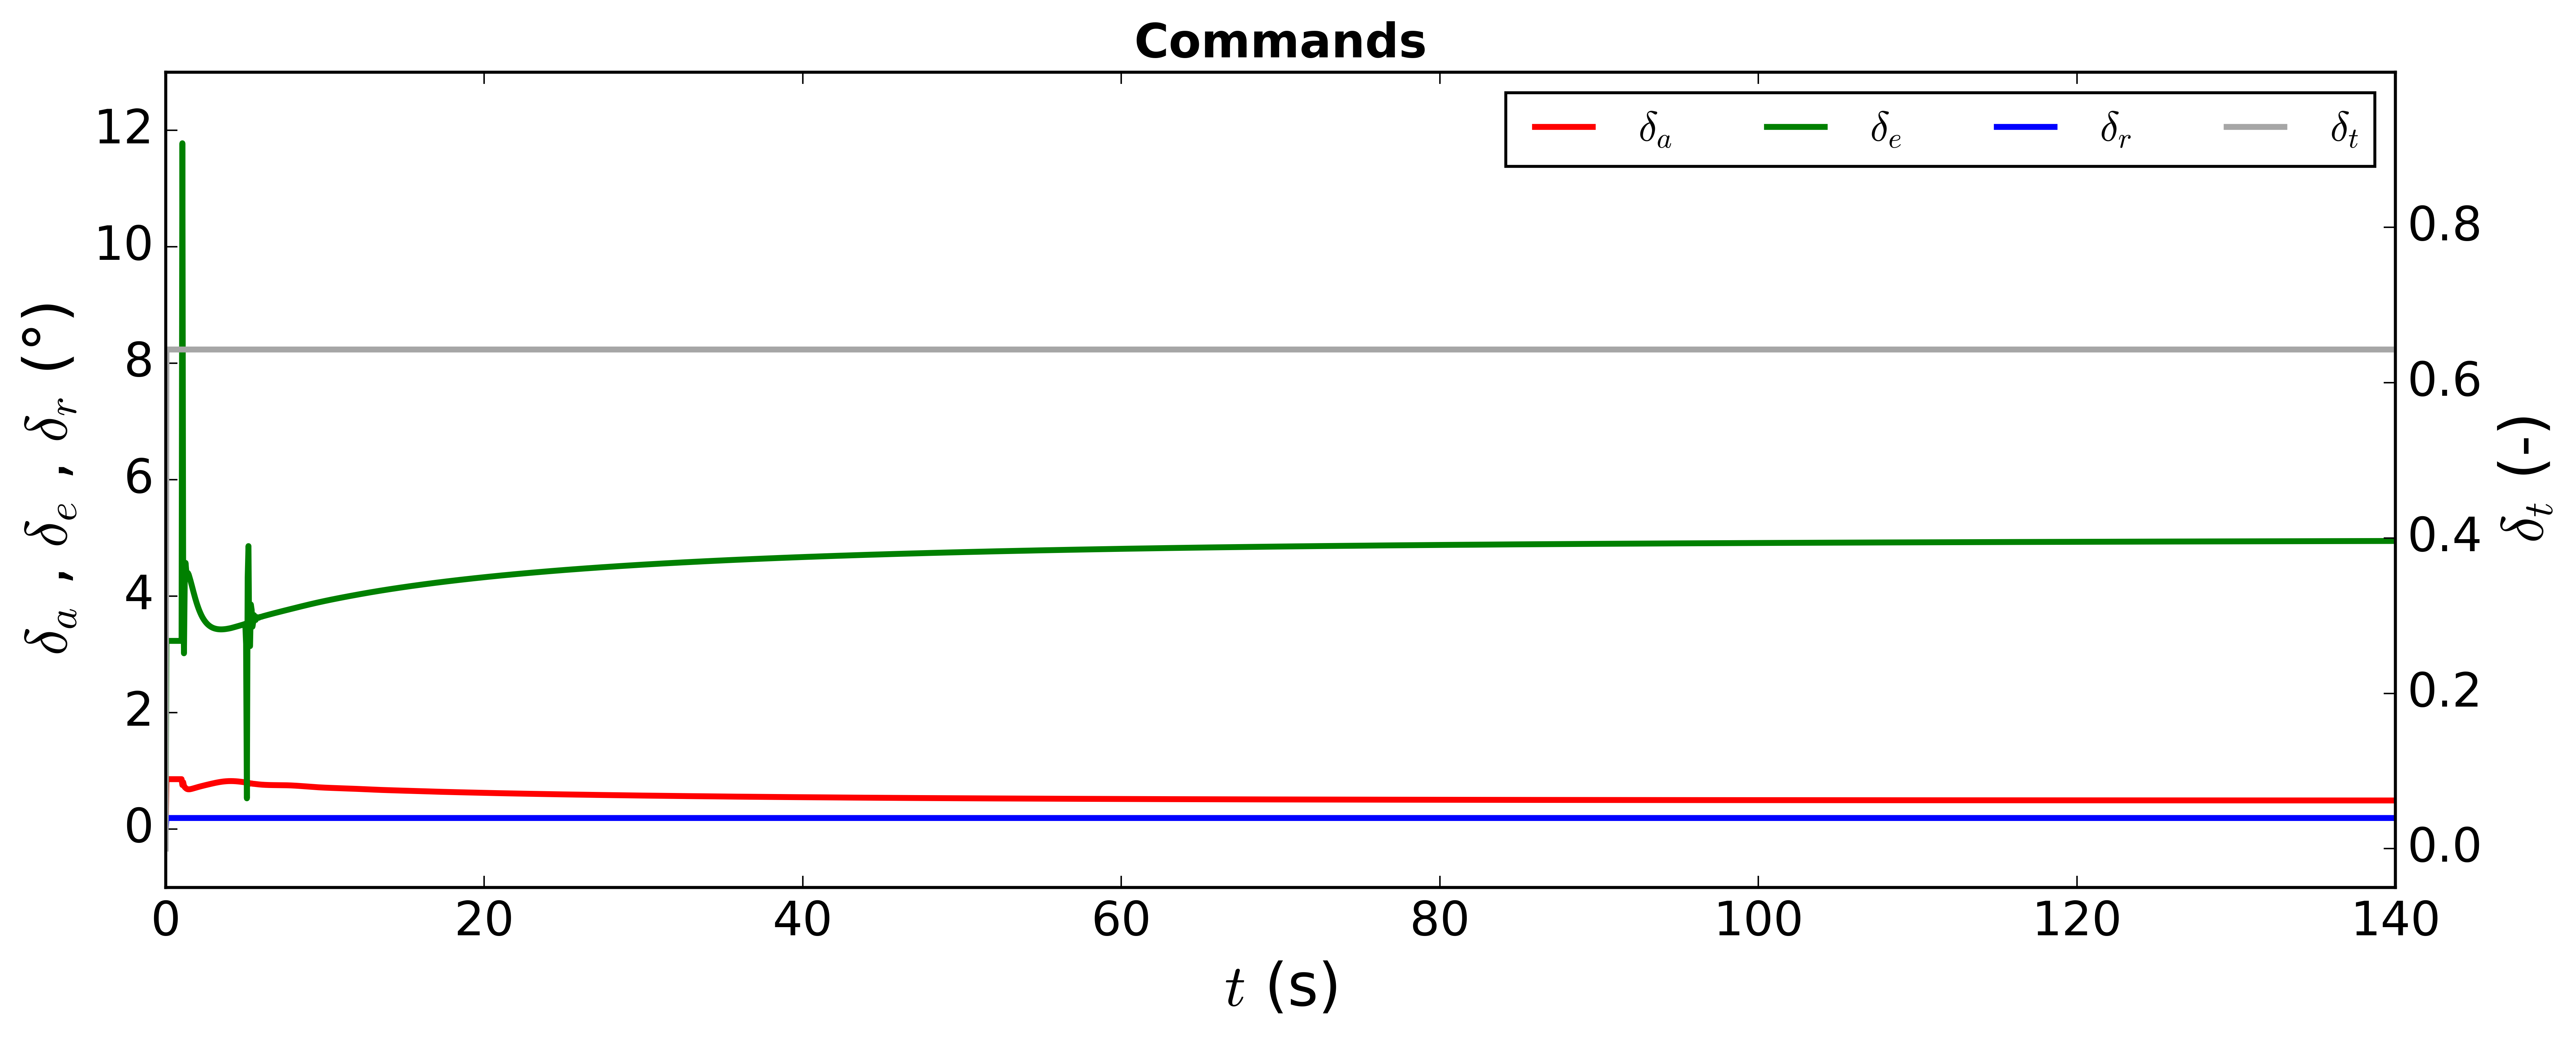

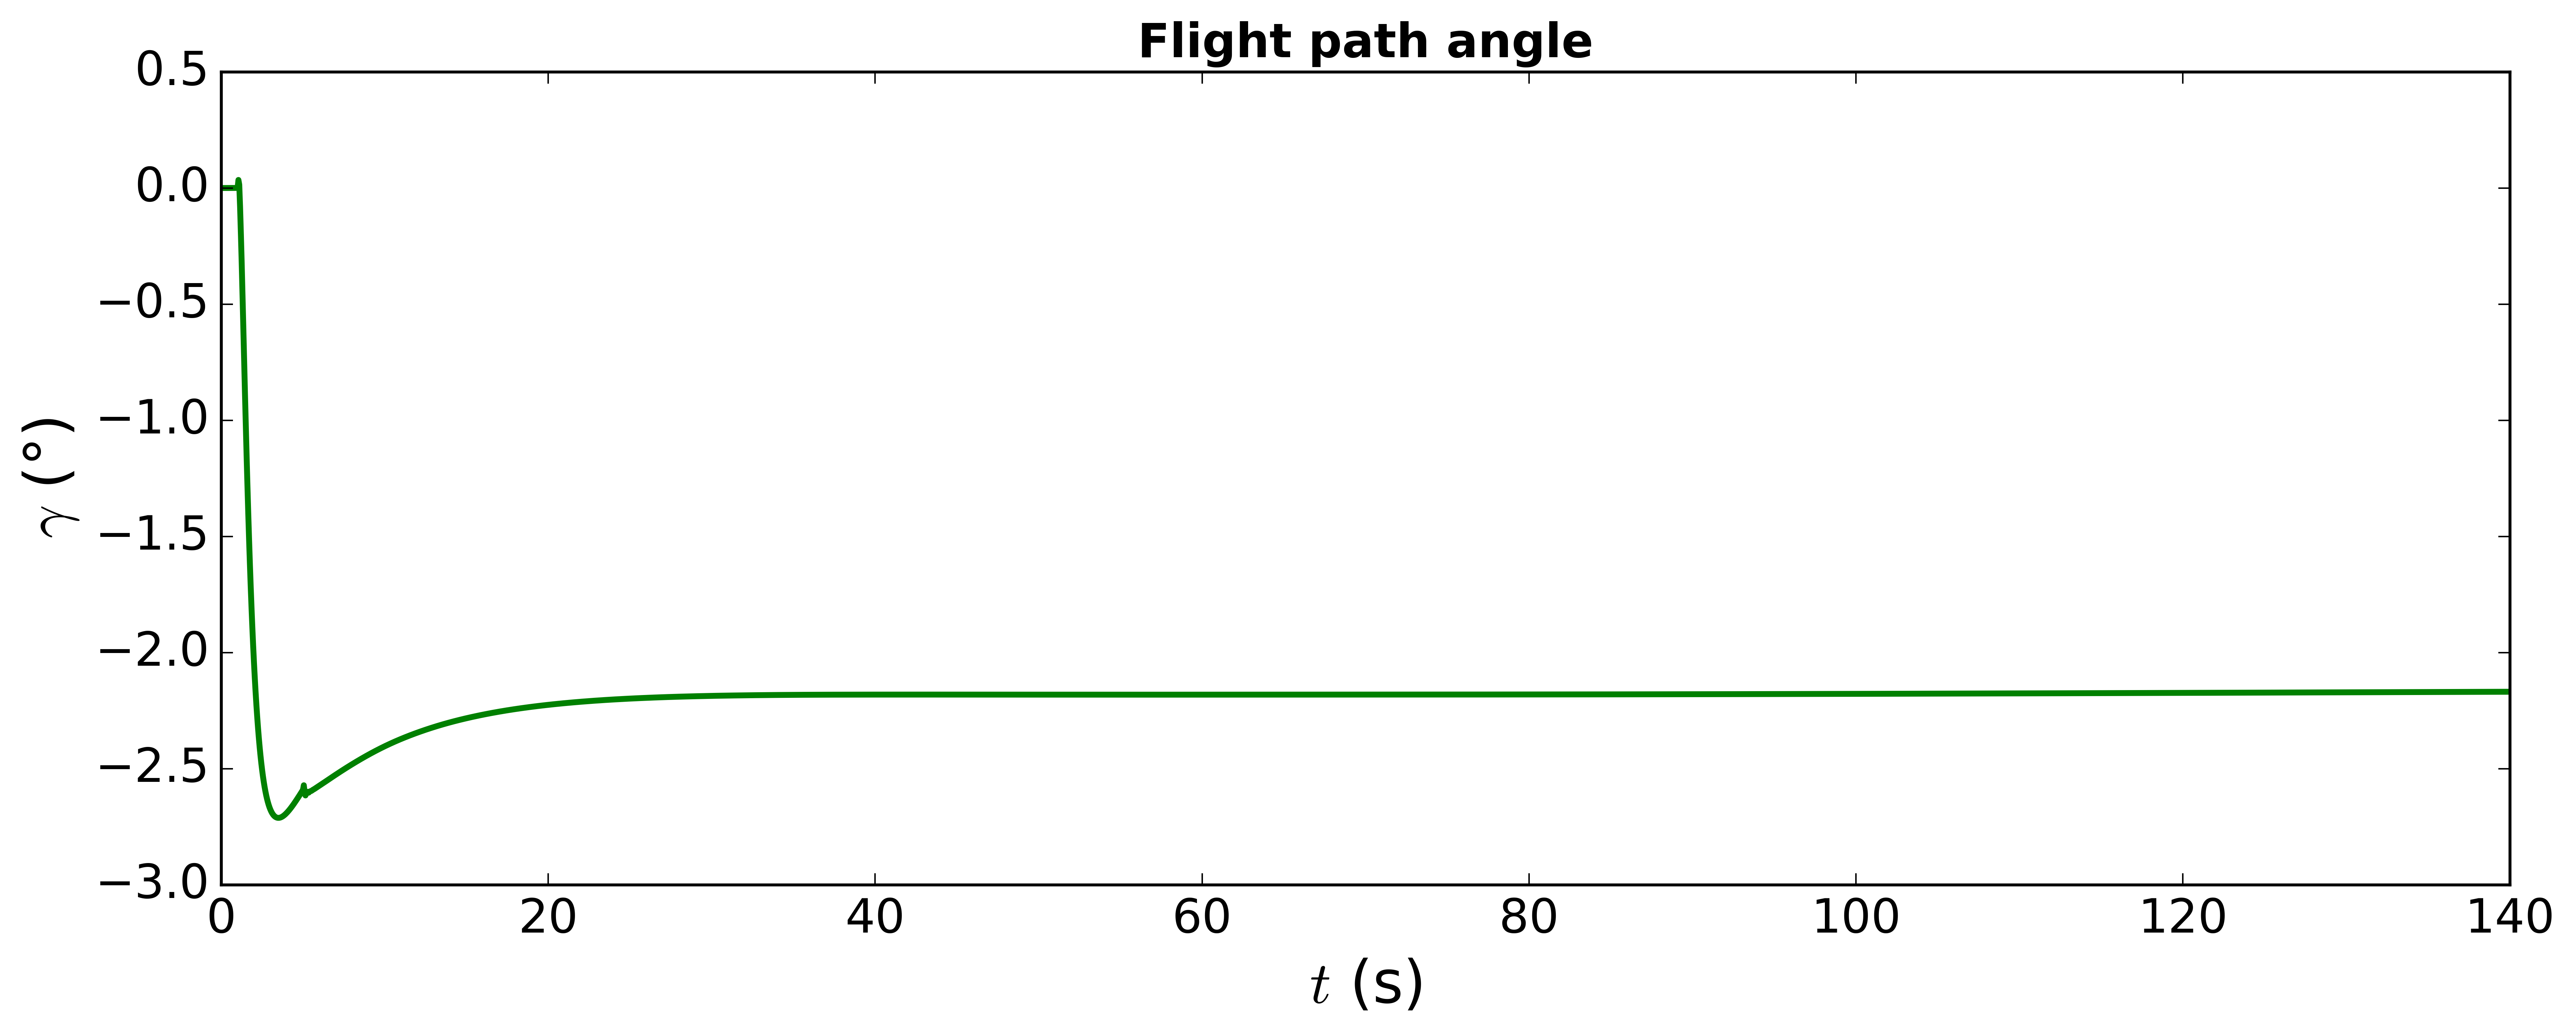

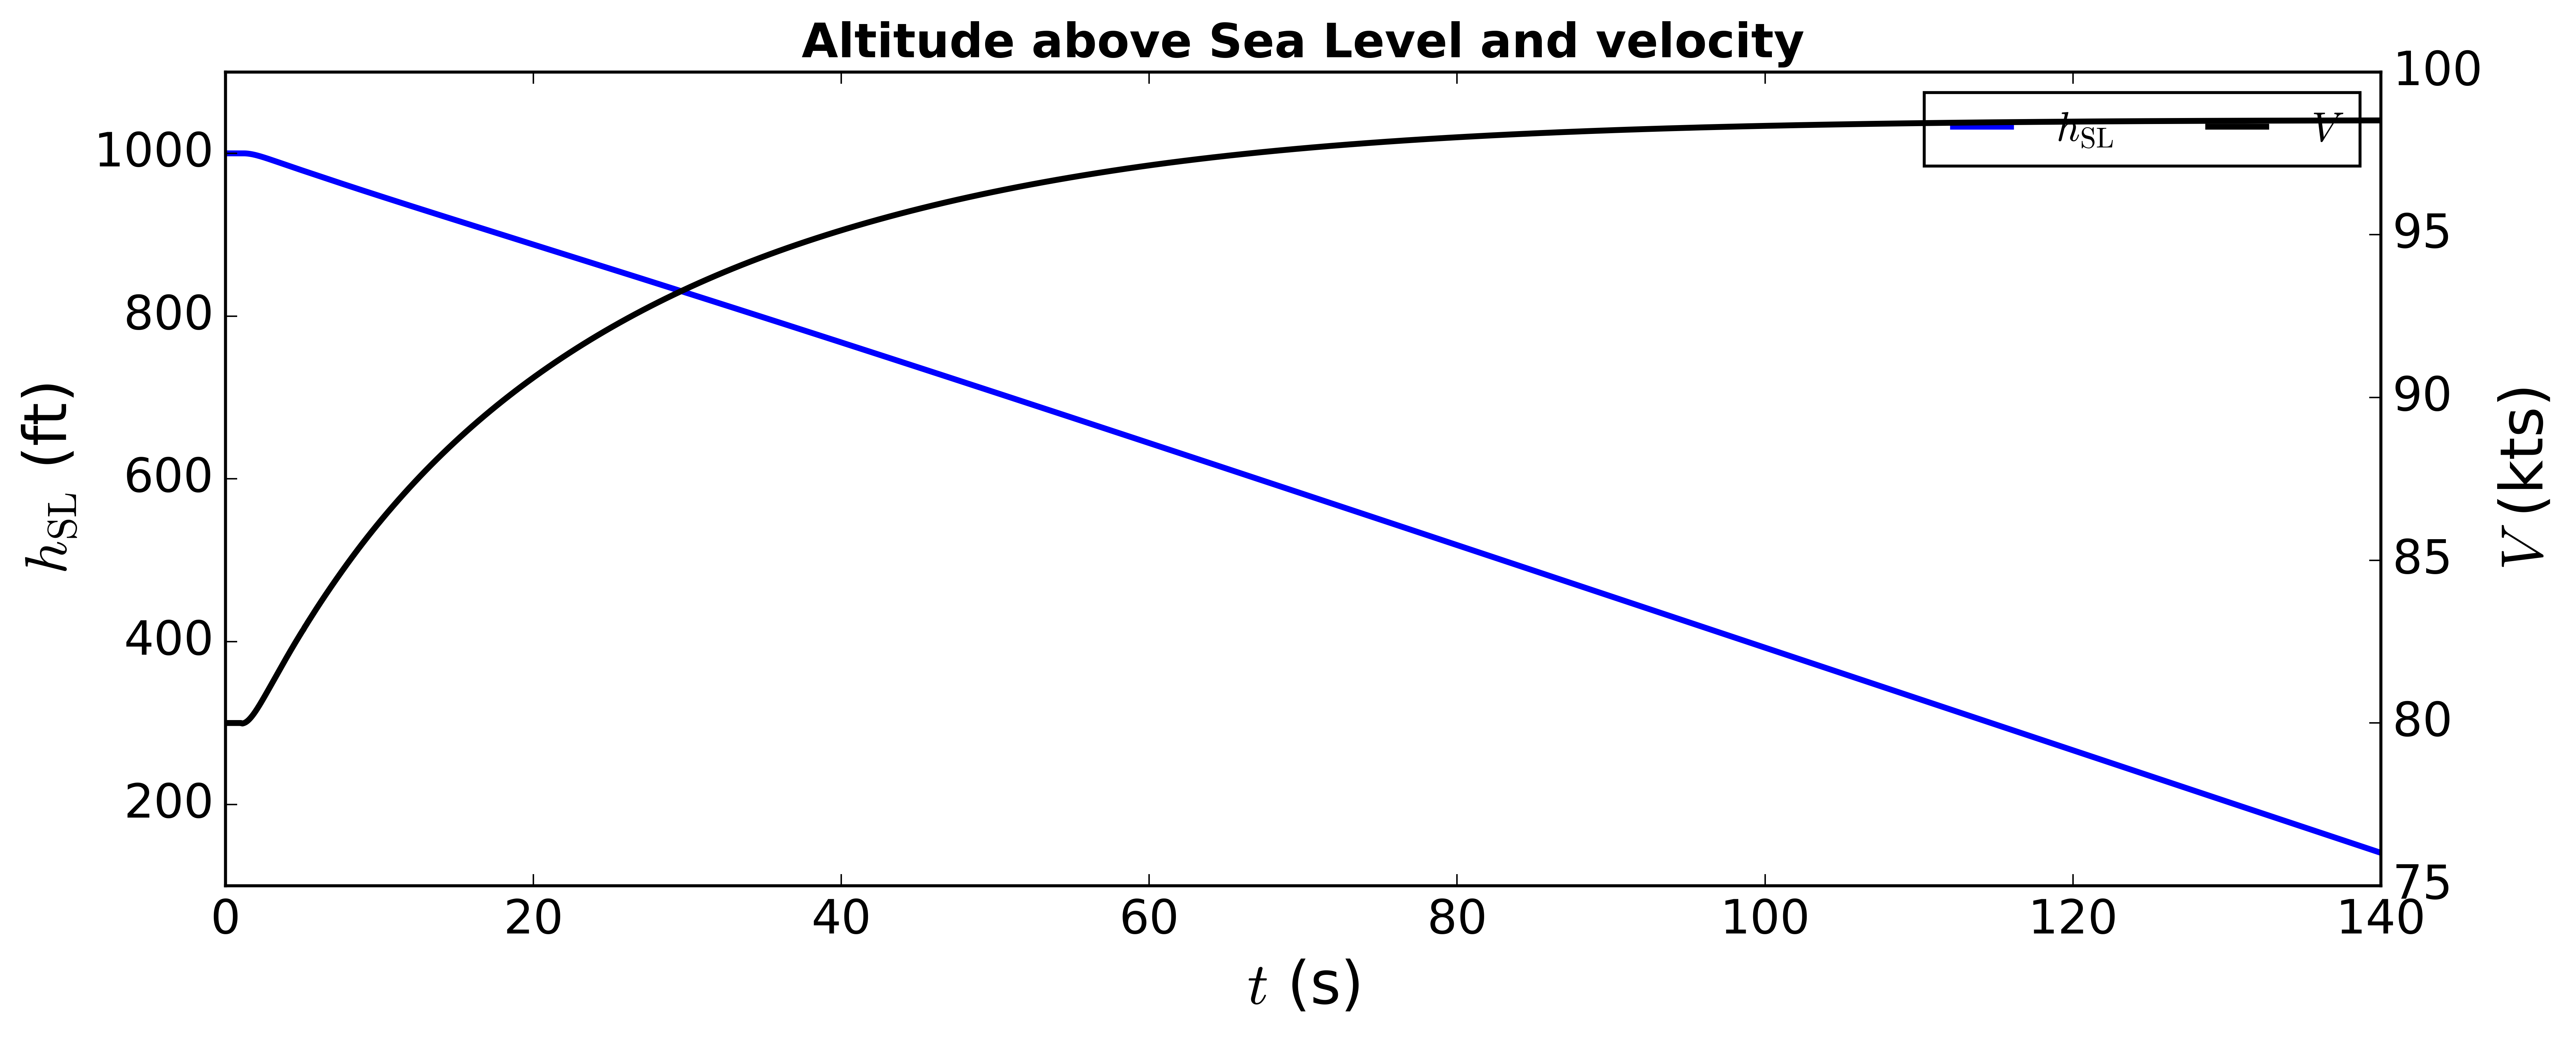

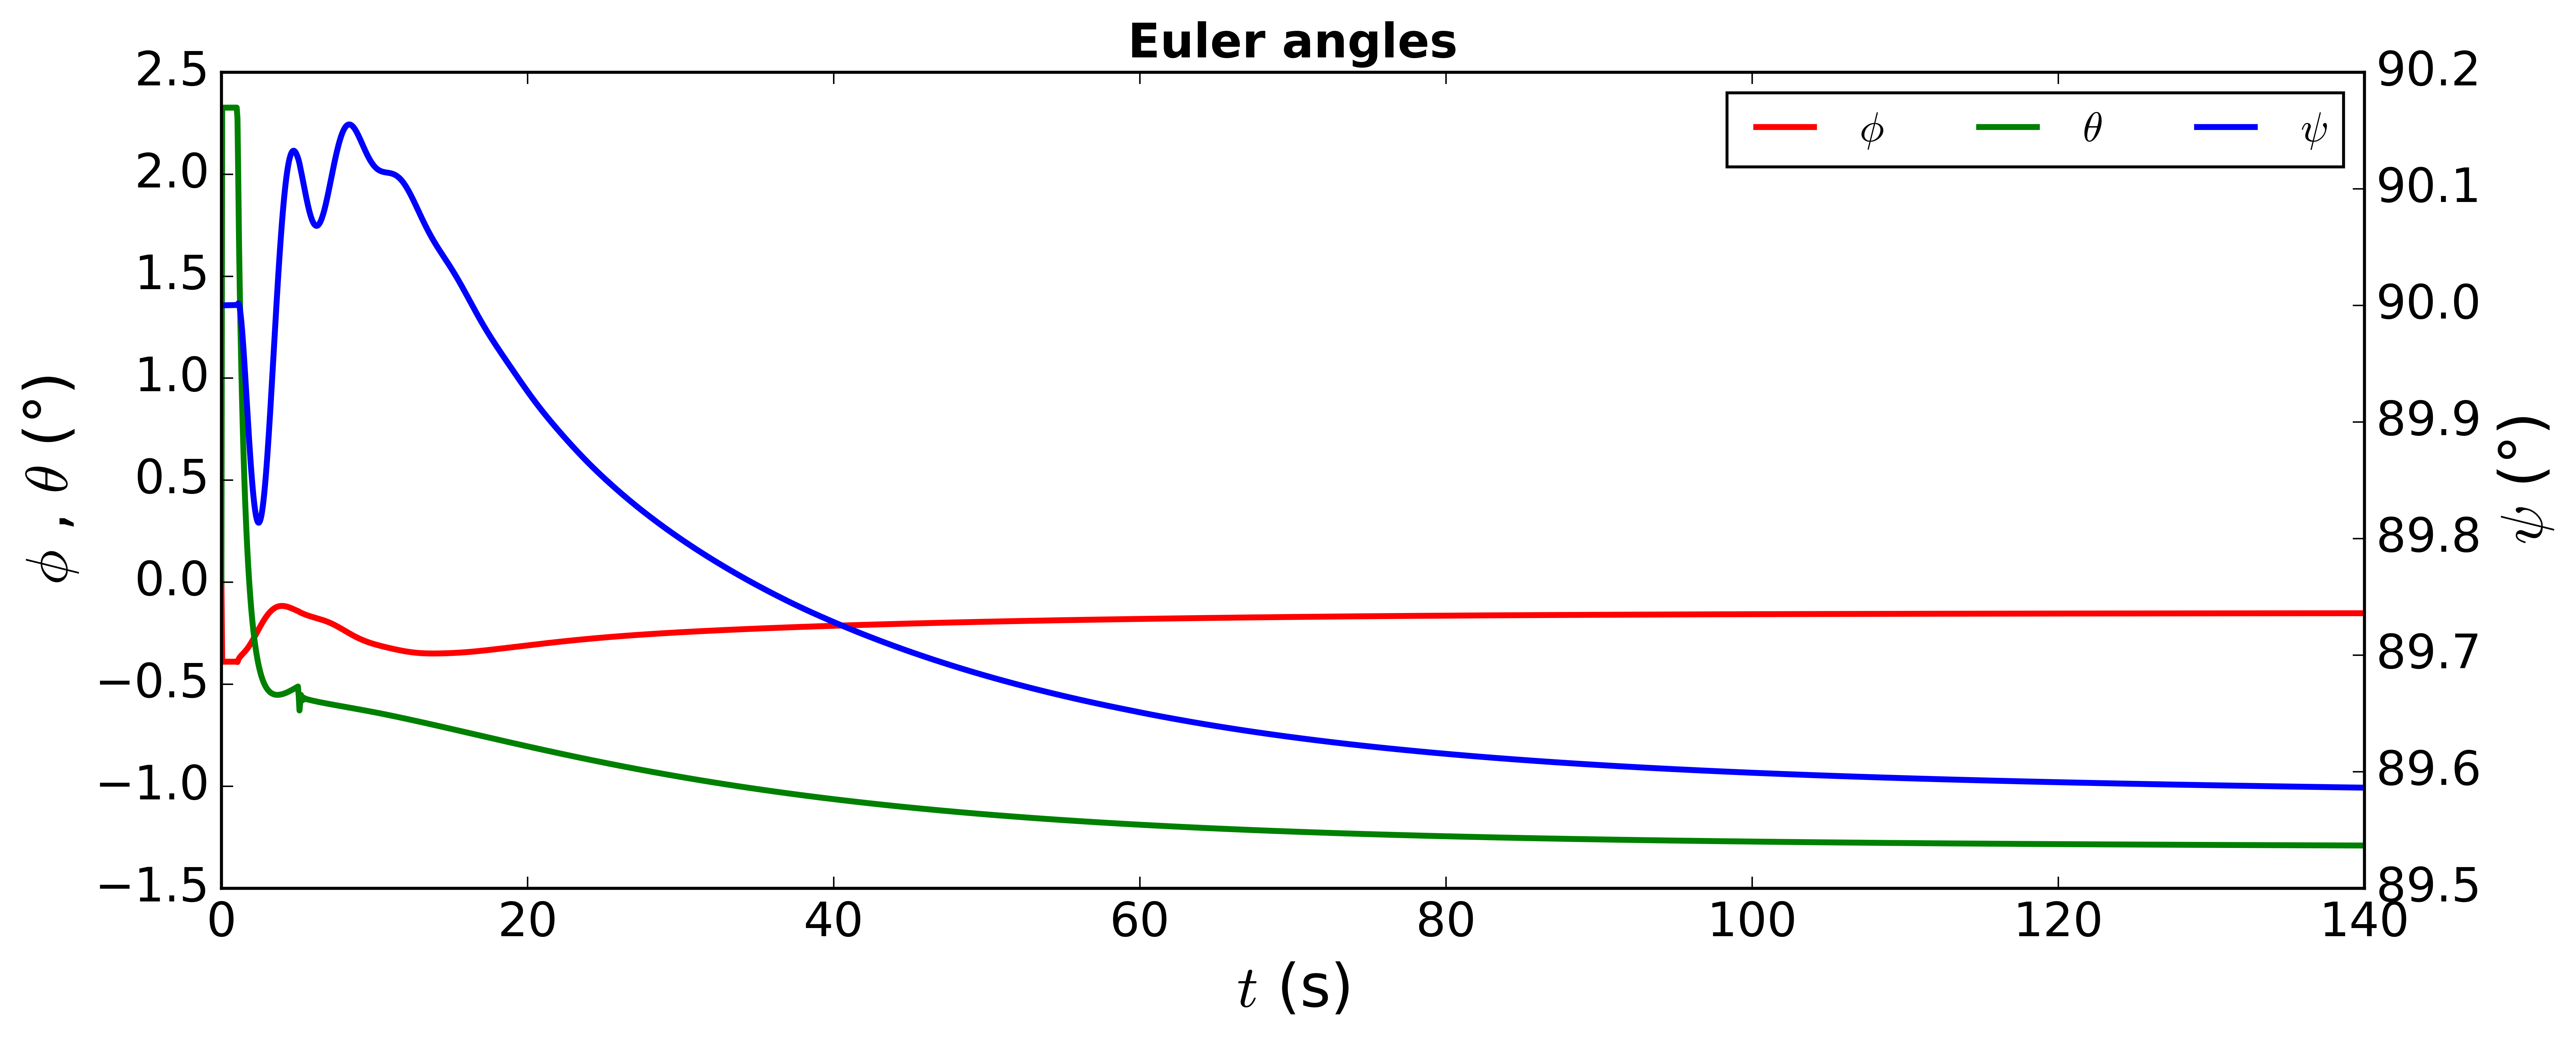

In [4]:
# JSBSim script launch command
os.system('../JSBSim/JSBSim --root=../JSBSim/ --script='+script_path+' > ../JSBSim/log_mantest_glide_hold_ap.txt')

dh.move_files_to_folder('*.csv',dest_folder,'../JSBSim/')
dh.move_files_to_folder('*.txt',dest_folder,'../JSBSim/')

# Extract data arrays from output .csv files
sim = ACDataPlots('C172x_unina',dest_folder)

# Plot time histories
sim.plot_Commands()
sim.plot_gamma()
sim.plot_AltitudeVelocity()
sim.plot_EulerAng()

## Trajectory visualization

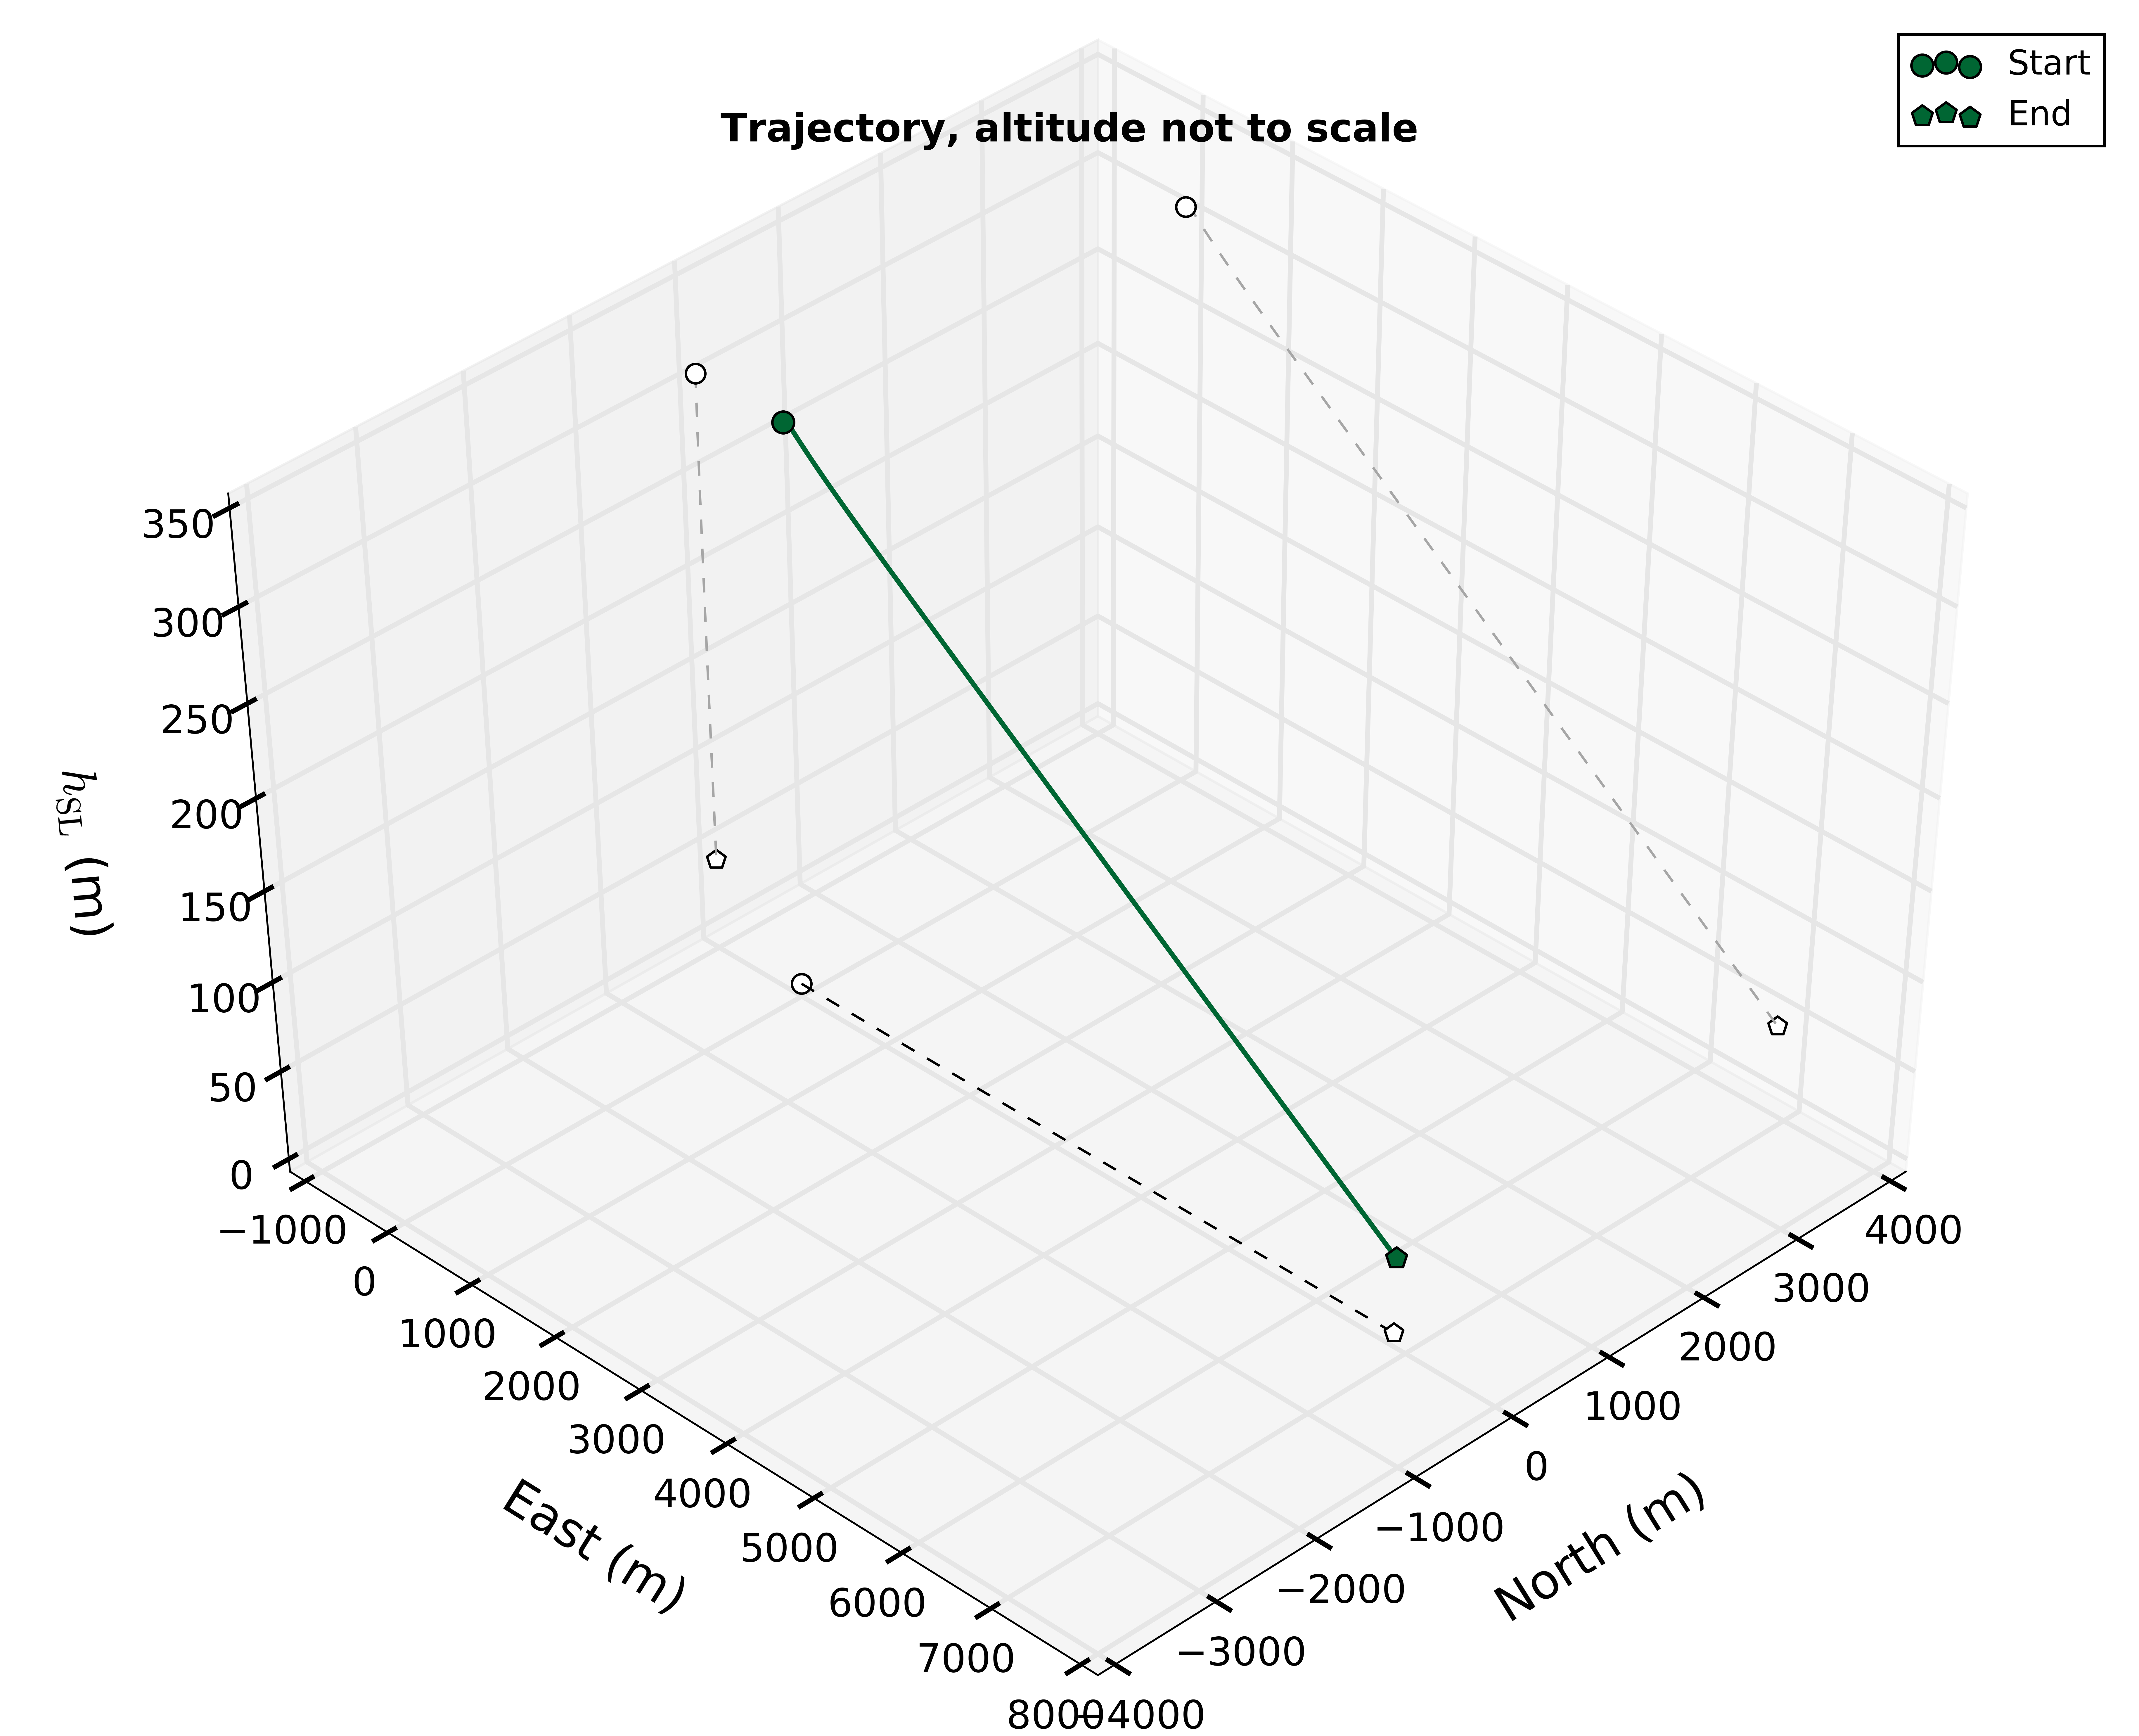

In [5]:
sim.get_traj_in_NEA()
sim.plot_GroundTrack()
sim.plot_traj3D_in_NEA(view=(45,45),Y_proj='W')